## Import Image and Video
ขั้นแรกเราจะนำเข้า **libaries  NumPy** หรือบางครั้งเรียกว่า num-pie โดยใช้  ตัวบ่งชี้เป็น np จากนั้นเราจะนำเข้า **libaries CV2** ตอนนี้เราก็พร้อมที่จะใช้คำสั่ง OpenCV.
เมื่อเราจะอ่านภาพ เราสามารถสร้างตัวแปรทีขึ้นมาหนึ่งตัว เพื่อเก็บค่าคำสั่ง **CV2. Imread(“Image.jpg”)** ต่อไปเราต้องการแสดงภาพของ เราสามารถทำได้โดยใช้ **cv2.imshow** สำหรับ **CV2.waitKey** นี่เป็นคำสั่งที่บอกให้อินเทอร์เฟซการรอให้เป็นไปตามระยะเวลาที่กำหนดที่ระบุ โดยกำหนดเป็นมิลลิวินาที สุดท้ายคือเขียนภาพนี้กลับออกไปที่ไฟล์ เราสามารถทำได้โดยใช้ **CV2.imwrite** นอกจากนี้เรายังสามารถระบุชื่อไฟล์และการเปลี่ยนแปลงนามสกุลของภาพได้ด้วย

In [0]:
import cv2
import numpy as np


In [0]:
import cv2
import numpy as np
img = cv2.imread("opencv-logo.png",cv2.IMREAD_COLOR)



cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("Push_out.jpg",img)

True

ในการอ่านวีดีโอนั้น จะใช้คำสั่ง **cv2.VideoCapture()** ในการ นำเข้าวีดีโอและโปรแกรมจะอ่านภาพในแต่ล่ะ frame ตั้งแต่ต้นจนจบวีดีโอนั้น และการหยุดเล่นวีดีโอทำได้โดยการ กดอักษร **q** ตัว ในแป้นพิมพ์

In [0]:
##Capture Video from Camera

cap=cv2.VideoCapture(0)
while (True):
   
    ret, frame= cap.read()
    
    g = cv2.cvtColor(frame, 1)
    cv2.imshow("frame",g)
    
    ch=cv2.waitKey(1)
    if ch & 0xFF== ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindow()

#cap may not have initialized the capture. In that case, 
#this code shows error  True -->  cap.isOpened()  


In [0]:
#Playing Video from file
cap=cv2.VideoCapture("1 year old boy head banging-yCaymsrcNwA.webm")

while (cap.isOpened()):
    ret, frame= cap.read()
    if ret:
         frame= cv2.resize( frame, (640,480)) 
    

    # Display the resulting frame
    cv2.imshow('frame',frame)
    
    ch=cv2.waitKey(100)       #ปรับความเร็ว
    if ch & 0xFF== ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

**Saving a Video**

In [0]:
#Saving a Video
cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
#FourCC code is passed as cv2.VideoWriter_fourcc('M','J','P','G') 
#or cv2.VideoWriter_fourcc(*'MJPG) for MJPG.


out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame= cv2.resize( frame, (640,480))

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

## Data types and structures
ในภาพประกอบไปด้วยอาร์เรย์ ของ ค่าสีในแต่ละ Pixel ดังนั้นการประมวลผลภาพสิ่งสำคัญคือต้องทำความเข้าใจเกี่ยวกับการใช้งานและสร้างเมทริกซ์หรืออาร์เรย์ NumPy. 

คำสั่งแรกที่เราจะให้ คือ **np.zeroes()**  ซึ่งจะสร้างอาร์เรย์ที่มีค่าเป็นศูนย์ Display จะปรากฏเป็นสีดำ จากตัวอย่างจะให้  Display มีความสูง 150 Pixel และ กว้าง 200 Pixel และมีเพียง channel และ u สำหรับ unsigned แล้ว int16 เพื่อระบุว่าเป็น 2 ยกกำลัง 8 ซึ่งจะระบุว่าช่วงของค่าที่ได้รับในเมทริกซ์นี้จะเป็น 0-255 

และเมื่อสร้าง Display เป็นสีอื่นๆ โดยเพิ่ม channelเป็น 3 channels สำหรับเก็บค่าสีำเงิน เขียว และแดง.และ ใช้ **cl[:,:,i]** (i เป็นตัวเลข 0-2) ในการระบุตำแหน่งของแต่ล่ะ channel     



In [0]:

color=np.zeros([150,200,1],"uint8")
cv2.imshow("color",color)


cl=np.zeros([150,300,3])
cl[:,:,0] = np.ones([150,300])*0/255.0
cl[:,:,1] = np.ones([150,300])*180/255.0
cl[:,:,2] = np.ones([150,300])*0/255.0

cv2.imshow("image", cl)

cv2.waitKey(0)
cv2.destroyAllWindows()

โดยพื้นฐาน ภาพจะปรพกอบด้วย 3 channels ดังที่เคยกล่าวไป และคำสั่ง **cv2.split()** เป็นการแยก channelของแต่ล่ะสีในระบบ RGB จากนั้นเราต้องการรวมข้อมูลเหล่านี้กลับเป็นภาพเดียวโดยใช้คำสั่ง **cv2.merge()** จากภาพแรกของ image_Split จะเห็นได้ว่าเป็นการรวมข้อมูลของ channels สีแดง คือเอาสีแดง 3channels มารวมกัน ทำให้บริเวณภาพที่มีสีแดง มีสีสว่างขึ้น
จากนั้น ก็ลองแยก channels ของสีในระบบ [HSV](http://colorizer.org/)  จะเห็นได้ว่าภาพที่มีลัษระแต่ต่างกันออกไป 

In [0]:
#Split color
img = cv2.imread("hqdefault.jpg",cv2.IMREAD_COLOR)
cv2.imshow('image',img)
cv2.moveWindow("Image",0,0)  #we're going to explicitly set the window
print(img.shape)
height,width,channels = img.shape    # height = img.shape[0], width = img.shape[1] and channel= img.shape[2]

b,g,r = cv2.split(img)     #split channels of the color image
rgb_split= np.empty([height,width*3,3],"uint8")
rgb_split[:,0:width]= cv2.merge([r,r,r])
rgb_split[:,width:width*2]= cv2.merge([b,b,b])
rgb_split[:,width*2:width*3]= cv2.merge([g,g,g])
cv2.imshow('image_Split',rgb_split)
cv2.moveWindow("image_Split",0,height)

hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV) #conversion from BGR to HSV
h,s,v= cv2.split(hsv)
hsv_split=np.concatenate((h,s,v),axis=1)
cv2.imshow("Split_HSV",hsv_split)


cv2.waitKey(0)
cv2.destroyAllWindows()




(360, 480, 3)


# Histogram

Histogram เป็นกราฟหรือ พล็ตซึ่งจะแสดงการกระจายความเข้มข้นของแสงในภาพ ทั้งในระบบ RGB และ gray scale  x-axis คือ พล็อต ของ pixel หรือที่เรียกว่า  BIN  จะมีค่าตั้งแต่ 0 -255  และ y-axis พล็อต ของจำนวน pixel ที่เหมือนกัน 0 คือค่า pixe  ที่มืดที่สุด และ 255 คือค่า pixe ที่สว่างที่สุด
comtrast คือการกระจายแสงภายในภาพ หรือเรียกว่าค่าความแตกต่างของสี โดยภาพที่มี comtrast ที่มาก แสดงกว่ามีการกระจายแสงที่ดี ภาพที่ได้จะมีความคมชัดมากขึ้น แต่เมื่อเพิ่ม  comtrast มากเกินไป จะทำให้เกิดการกระจายตัวของ Histogram ความเข้มแสงเพิ่มขึ้น ซึ่งทำให้เกิดช่องว่างภายใน Histogram (gaps) แต่เมือลด comtrast ลง การกระจายตัวของ Histogram ลดลง จนทำให้เกิดการรวมตัวกันของค่าความเข้มข้นในบริเวณที่ใกล้เคียง จึงำให้เกิดเป็นยอดสูง(Spikes)

Cumulative Histogram ได้มาจากค่า Intensity สะสมของ Histogram ของภาพ ซึ่งมันจะมีประโยชน์ในการดำเนินการบางอย่างเกี่ยวกับภาพโดยใช้ Histogram เช่น การทำ Histogram Equalization เป็นต้น

Histogram Equalization คือการปรับ comtrast และ Dynamic Range ของภาพ หรือการปรับ Cumulative Histogram ให้มีลักษณะใกล้เคียงกับเส้นตรงมากที่สุด!!




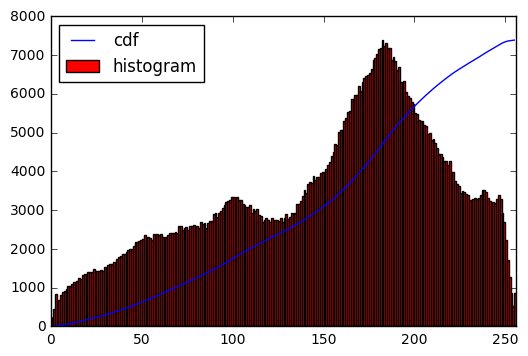

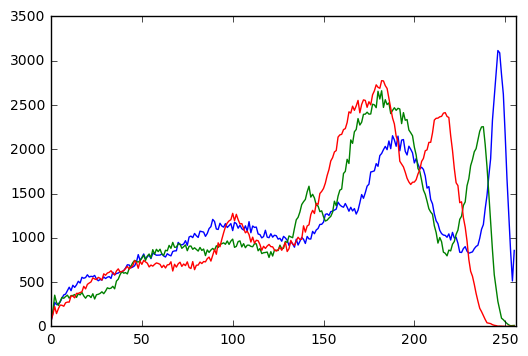

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('DSCF7032.jpg')
img = cv2.resize(img, (600,480), interpolation=cv2.INTER_NEAREST)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()



plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

cv2.imshow("Image",img)


cv2.waitKey(0)
cv2.destroyAllWindows()


**Histogram Equalization**

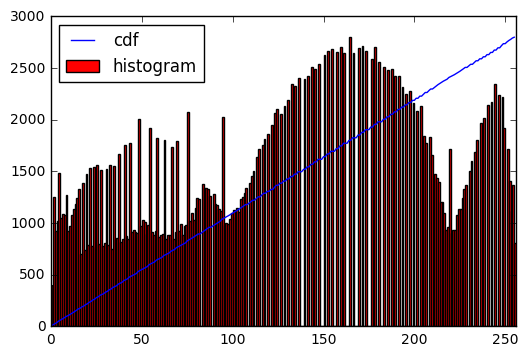

In [0]:
img = cv2.imread('DSCF7032.jpg',0)
img = cv2.resize(img, (600,480),)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)



output = cv2.imread('res.png',0)
cv2.imshow("Image",output)

hist,bins = np.histogram(equ.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()



plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

# Geometric Transformations of Images

1.สำหรับการปรับขนาดของภาพ เราสามารถใช้คำสั่ง **cv2.resize()** โดยสามารถระบุขนาดที่แน่นอนของภาพ หรือ ระบุอัตราส่วนของภาพ output ต่อ image และ ตั้งค่าโหมดการแก้ไขสำหรับกระบวนการปรับขนาด interpolation 

2.วิธีที่เราจะหมุนภาพคือการใช้การแปลงเมทริกซ์ โดยใช้ **cv2.getRotationMatrix2D()** จากนั้นเราจะกำหนดจุดที่เราต้องการให้หมุนรอบตัว  ในกรณีนี้หากเราเลือก จุดกึ่งกลางของภาพเป็นแกนหมุน สิ่งต่อไปที่ต้องระบุคือ องศาการหมุน ตอนนี้คุณสามารถใช้เมทริกซ์การแปลงนี้เพื่อหมุนภาพได้โดยใช้คำสั่ง **cv2.warpAffine ()**

3.Translation คือการเคลื่อนตำแหน่งของ object หรือจะเรียกว่าเป็นการย้ายจุด (x,y) มาอยู่ในตำแห่ง (tx,ty)

             M=[1 0 tx
                0 1 ty ]
                
  จากนั้นก็ทำการแปลงภาพโดยใช้ คำสั่ง**cv2.warpAffine ()**

4.สำหรับ Perspective Transformations เป็นการ crop ภาพ เราต้องการ 3x3 transformation matrix ที่ระบุ จุด(x,y)ทั้ง4จุดใน input image โดยทั้งสี่จุดเรียงกันเป็นรูปสี่แหลี่ยวล้อมบริเวณที่เราจะ crop และ จุด(x,y) 4 จุดที่เป็น left, top, right และ bottom ของ output image 
จากคำสั่ง**cv2.getPerspectiveTransform()** เราก็จะสามารถแปลงค่า  Array ทั้งสองเป็น transformation matrix แล้วนำ matrix ที่ได้มาแปลงภาพ โดยใช้ **cv2.warpPerspective()**  

In [0]:
img = cv2.imread("iPhone-8-rouge-PRODUCT-RED.jpg",1)

# Scale
img_half = cv2.resize(img, (0,0), fx=0.5, fy=0.5) # x output = 0.5x ,y output = 0.5y
img_stretch_near = cv2.resize(img, (600,600), interpolation=cv2.INTER_NEAREST) 

cv2.imshow("Half",img_half)
cv2.imshow("Stretch",img_stretch)
cv2.imshow("Stretch near",img_stretch_near)

# Rotation
M = cv2.getRotationMatrix2D((img.shape[1]/2,img.shape[0]/2), 90, 1) # Rotation 90 grade
rotated = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow("Rotated",rotated)

#Translation
M = np.float32([[1,0,100],[0,1,50]]) #translate 100 in x- direction and 50 in x- direction
dst = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))
cv2.imshow("Translation",dst)

#Perspective Transformations
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]]) #identify the localization 
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2) # transform pts1 to pts2

pt = cv2.warpPerspective(img,M,(300,300)) 

cv2.imshow("Perspective",pt)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Morphological image processing

เราใช้ filter เพื่อ ช่วยลดความแปรปรวนที่ไม่พึงประสงค์ของภาพ การทำให้ภาพใช้งานได้ง่ายขึ้น 

1.**Gaussion Blur** ใช้เพื่อลด noise และช่วยลดการแปรปวนที่ไม่พึงประสงค์ของภาพและทำให้ภาพ smooth มากขึ้น โดยการเฉลี่ยค่า pixel values กับpixel ข้างๆ กล่าวอีกนัยหนึ่งพิกเซลที่อยู่ใกล้กับพิกเซลเป้าหมายจะส่งผลต่อ ค่าเฉลี่ยสูงกว่าค่าเพิกเซลที่อยู่ห่างไกล ในคำสั่ง cv2.GaussianBlur() สามารถกำหนดว่าจะทำให้ภาพเบลอในแต่ละแกนเท่าใด ค่าเหล่านี้ทั้งหมดต้องเป็นเลขคี่และกำหนดขนาดของภาพเบลอที่เกิดขึ้นในแต่ละทิศทาง ตัวอย่างเช่นการใช้ค่า 5,55 จะเบลอภาพเล็กน้อยที่แกน x และมากขึ้นในแกน y

2.**Dilation and Erosion** Dilation filter คือการขยาย Features เป็นการเปลี่ยนเปลี่ยน black pixel หรือ background pixel ให้เป็น  white pixel เพื่อ กำจัดรู หรือ gab ภายใน foreground ส่วน Erosion filter คือการลด Features เป็นการเปลี่ยนเปลี่ยน white pixel ให้เป็น black pixel หรือ background pixel เพื่อ กำจัดหรือลด  false opsitiv หรือ brighter pixel. การคำนวณทำได้โดยการสไลด์ Kernel template หรือที่เรียกอีกอย่างว่า structuring Element (S) ไปตาม binary image(B)

Dilation = B - S 

Erosion = B + S

3.**Opening and closing** ใช้เมื่อเราต้องการที่จะกำจัดbrighter pixel หรือ gab แต่ ไม่อยากให้ขนาดของ objects เปลี่ยนไปมาก

Opening = (B-S)+S : ใช้ในการกำจัด noise หรือ narrow bridges

closing = (B+S)-S :ใช้กำจัดรูเล็กๆ หรือจุดภายใน foreground 


In [0]:
#Gaussion Blur

image = cv2.imread("b7395b22aa724ccdc3d1b49de79a7a78.jpg",cv2.THRESH_BINARY)
cv2.imshow('Original',image)
#In other words, pixels that are closer to the target pixel have a higher impact 
#with the average than pixels that are far away. 
#This is how the smoothing works.
blur= cv2.GaussianBlur(image,(55,5),0)
cv2.imshow('Blur',blur)
#Median Filtering
median = cv2.medianBlur(image,5)  #add a 50% noise to our original image
cv2.imshow('Median',median)


#Dilation AND Erosion  
#They work by sliding a kernel template, a small square, across an image
kernel= np.ones((5,5),"uint8")
dilate= cv2.dilate(image,kernel,iterations=1)
cv2.imshow('Dilation',dilate)
erode= cv2.erode(image,kernel,iterations=1)
cv2.imshow('Erosion',erode)

#Opening AND closing
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
cv2.imshow('opening',opening)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
cv2.imshow('closing',closing)

cv2.waitKey(0)
cv2.destroyAllWindows()



# Image Thresholding and Binary Image
ภาพไบนารีเป็นภาพที่มีค่า Pixel เป็นศูนย์หรือหนึ่ง เป็นหลักหนึ่งบ่งชี้ชิ้นส่วนของวัตุในภาพ

1= วัตถุภายในภาพ
0 = คือส่วนอื่นๆ

ภาพไบนารีใช้องค์ประกอบหลักของอัลกอริธึมการประมวลผลภาพ ภาพเหล่านี้เป็นภาพขาวดำ หนึ่งในวิธีทั่วไปที่ใช้สร้างภาพไบนารีคือการใช้สิ่งที่เรียกว่าอัลกอริธึม thresholding **cv2.threshold()**  โดยเป็นเกณฑ์ที่ใช้ในการจำแนกค่าพิกเซล  เพื่อตัดสินว่าพิกเซลหรือกลุ่มพิกเซลเดียวควรมีค่าเป็นศูนย์หรือหนึ่ง และที่สำคัญก่อนจะใช้คำสั่ง **cv2.threshold()** ควรเปลี่ยนให้ภาพเป็น ภาพขาวดำเสียก่อน

และในบางครั้งภาพอาจจะมีแสงมากเกินไปหรือไม่สม่ำเสมอ การใช้ thresholding อาจจะทำให้ได้ภาพที่มีบางส่วนขาดหายไป และเพื่อเพิ่มประสิทธิภาพในการแยกส่วนประกอบของภาพให้ดีมากยิ่งขึ้น เราจะใช้ Adaptiv thresholding  **cv2.adaptiveThreshold()**



In [0]:
import numpy as np
import cv2

img8 = cv2.imread('sudoku.png',0)
cv2.imshow("Original",img8)
#Basic Binary
ret,thresh_binary = cv2.threshold(img8,70,255,cv2.THRESH_BINARY)
cv2.imshow("Basic Binary", thresh_binary)

#Adaptive Thresholding
#cv2.ADAPTIVE_THRESH_GAUSSIAN_C => threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
# 115 => How far or localization of where the thresholding will act over
#1 => a mean subtraction from the end result
thres_adaptive = cv2.adaptiveThreshold(img8, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow("Adaptive Threshold",thres_adaptive)

cv2.waitKey(0)
cv2.destroyAllWindows()

# contours Image
การ contours รูปก็เพื่อเป็นการระบุถึง Object ที่เราสนใจ ในขั้นแรกรูปจะต้องถูกแปลงเป็น Gray image และ binary Image ตามลำดับ เพื่อที่จะสามารถแยกตำแห่งของ foreground และ background ได้อย่างถูกต้อง โดยอัลกอริทึมสร้างเขตแดนรอบวัตถุทั้งหมด การเปรียบเทียบ pixelที่สนใจกับ pixelที่อยู่ใกล้เคียง ขณะที่อัลกอริธึมทำงานจะพยายามลดเขตรอบวัตถุทั้งหมดเหล่านี้จนกว่าจะเจอขอบของ object คือบริเวณใจที่ค่าการเปลี่ยนแปลงของ pixel ที่มาก 


In [0]:
#convert this into a grayscale image 
img2 = cv2.imread('geometry-2d-relations-3d.jpg',1)
gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY) #Gray Image
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)   #Binary Image
cv2.imshow("Binary", thresh) 

#first one is source image, second is contour retrieval mode, third is contour approximation method.
_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
 
img3 = img2.copy()
index = -1
thickness = 4  #draws outline in the Image: thickness>0, fills the area bounded thickness<0
color = (255, 255, 0)

cnt = contours[0]  #To draw an individual contour #len(contours)= 15
#To draw the contours
cv2.drawContours(img3, [cnt], index, color, thickness) #for an individual contour "contours" swith to "[cnt]"
cv2.imshow("Contours",img3)

cv2.waitKey(0)
cv2.destroyAllWindows()

**Moment, Contour Area und Contour Perimeter** 

ขั้นแรกรูปจะต้องถูกแปลงเป็น Gray image และ binary Image ตามลำดับ จากนั้นสร้าง NP.zeros แล้วเราต้องการใช้มิติภาพต้นฉบับดังนั้นจะใช้ img.shape ระบุขนาดของ Array
ใช้ ** cv2.drawcontours() ** พล็อตเมตริกซ์ที่เราเพิ่งสร้างขึ้น นี่คือรายการของเส้นเดียวซึ่งเราใช้อยู่ในขณะนี้ เราจะระบุลบหนึ่งเพื่อระบุว่าเราจะเติมสีสันลงในรูปทรงเหล่านี้ให้สมบูรณ์ แล้วเราจะหาพื้นที่ โดยใช้พื้นที่พิมพ์เท่ากับพื้นที่ **CV2.contour() **  ของแต่ล่ะ object
Perimeter เท่ากับความยาวเส้นรอบวง สุดท้ายให้หาวิธีที่จะวาด centroid ของobject นี่เป็นจุดศูนย์กลางของวัตถุ ขึ้นอยู่กับพื้นที่พิกเซล เมื่อต้องการทำเช่นนี้เราต้องโมนเมนต์ของเส้นตรงก่อน **CV2.moments()** 



In [0]:
import numpy as np
import cv2

img = cv2.imread('geometry-2d-relations-3d.jpg',1)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow("Binary", thresh)

_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img2 = img.copy()
index = -1
thickness = 4
color = (255, 0, 255)

objects = np.zeros([img.shape[0], img.shape[1],3], 'uint8')
for c in contours:
    cv2.drawContours(objects, [c], -1, color, 4)

    area = cv2.contourArea(c)  # Contour area
    perimeter = cv2.arcLength(c, True) #length

    M = cv2.moments(c)  # center of mass of the object
    cx = int( M['m10']/M['m00'])
    cy = int( M['m01']/M['m00'])
    cv2.circle(objects, (cx,cy), 4, (0,0,255), -1) 
    #in order to draw onto our contours the exact middle points.
     # radius=4 

    print("Area: {}, perimeter: {}".format(area,perimeter))

cv2.imshow("Contours",objects)

cv2.waitKey(0)
cv2.destroyAllWindows()

Area: 126958.0, perimeter: 1522.0
Area: 2250.5, perimeter: 229.86500442028046
Area: 5209.5, perimeter: 315.60511779785156
Area: 5817.5, perimeter: 329.6051193475723
Area: 9958.5, perimeter: 412.60006630420685
Area: 2.5, perimeter: 8.242640614509583
Area: 420.5, perimeter: 107.9827550649643
Area: 4.0, perimeter: 7.656854152679443
Area: 0.5, perimeter: 6.2426406145095825
Area: 4411.0, perimeter: 263.76449942588806
Area: 4521.5, perimeter: 253.52185833454132
Area: 5407.5, perimeter: 275.32085049152374
Area: 8425.5, perimeter: 350.91882741451263
Area: 1458.5, perimeter: 163.4385987520218
Area: 2.0, perimeter: 5.656854152679443


**Object Dection** : เราจะใช้ขอบและการ contours เพื่อช่วยในการแยก object แต่ object ออกจากกัน

In [0]:
img = cv2.imread('geometry-2d-relations-3d.jpg',1)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow("Binary", thresh)
_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#Rotated Rectangle
im = img.copy()
cnt = contours[3]
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(im,[box],0,(0,0,0),2)

#Minimum Enclosing Circle
(x,y),radius = cv2.minEnclosingCircle(contours[12])
center = (int(x),int(y))
radius = int(radius)
cv2.circle(im,center,radius,(0,255,0),2)

# Fitting an Ellipse
ellipse = cv2.fitEllipse(contours[1])
cv2.ellipse(im,ellipse,(0,255,0),2)

#Fitting a Line : contains a set of white points
rows,cols = im.shape[:2]
[vx,vy,x,y] = cv2.fitLine(contours[2], cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv2.line(im,(cols-1,righty),(0,lefty),(0,255,0),2)


cv2.imshow("Contours",im)



cv2.waitKey(0)
cv2.destroyAllWindows()

# Canny Edge

Canny Edges เป็นอัลกอริธึมการตรวจจับขอบชนิดหนึ่งที่ทำงานได้ดีมากเพื่อช่วยในการแยกวัตถุภายในภาพได้ดีขึ้น โดยทั่วไปแล้วขั้นตอนการตรวจหาขอบจะดูที่อัตราหรือความเร็วที่สีจะเปลี่ยนไปในภาพ Canny Edges เป็นรูปแบบเฉพาะของอัลกอริธึมที่สร้างเส้นพิกเซลเดียวที่พื้นที่ที่สำคัญในภาพ วิธีนี้สามารถช่วยแบ่งวัตถุหากมีการซ้อนทับกันในกระบวนการแบ่งกลุ่มของเรา เราสามารถใช้ Canny Edges  **cv2.canny()**  แยกแยะรายละเอียดของภาพ  โดยมีหลักการดังนี้ ภาพจะถูกกรองด้วย filter ทั้งในแนวนอนและแนวตั้งเพื่อหาขอบในทิศทางแนวนอน () และทิศทางแนวตั้ง () จากภาพทั้งสองภาพนี้เราสามารถหาการไล่ระดับสีและทิศทางของขอบสำหรับแต่ละพิกเซล
หลังจากได้รับการไล่ระดับสีและทิศทางการสแกนภาพเสร็จสิ้นเพื่อลบพิกเซลที่ไม่พึงประสงค์ซึ่งอาจไม่เป็นขอบ สำหรับพิกเซลทุกพิกเซลจะได้รับการตรวจสอบกับพิกเซลที่อยู่ใกล้ที่สุด ผลที่ได้คือภาพไบนารีที่มี "ขอบบาง ๆ "
ขั้นตอนนี้จะตัดสินใจว่าขอบทั้งหมดเป็นขอบที่แท้จริงหรือไม่ สำหรับนี้เราต้องการค่า threshold สองค่าคือ minVal และ maxVal ขอบที่มีการไล่ระดับความเข้มมากกว่า maxVal จะต้องเป็นขอบแต่ถ้าระหว่าง maxVal และ minVal จะตรวจสอบให้แน่ใจว่าเป็นขอบหรือไม่ ไม่งั้นจะถูกละทิ้ง โดยการพิจารณาการเชื่อมต่อกับพิกเซล ถ้าเชื่อมต่อกับขอบที่มีการไล่ระดับความเข้มมากกว่า maxVal จะถือว่าบริเวณนั้นเป็นขอบด้วย

In [0]:

import numpy as np
import cv2

img = cv2.imread("DSCF6982.jpg",1)
img= cv2.resize(img, (0,0), fx=0.5,fy=0.5) 
cv2.imshow("Origin",img)


edges = cv2.Canny(img, 100, 70) # 100 and 70 for the lower and upper limit of the threshold of the edges.
cv2.imshow("Canny",edges)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Templat Detection

เป็นการค้นหา ตำแหน่งของ template image ใน larger image หรือการค้นหารูปแบบที่คล้ายคลึงกันระหว่างสองภาพ  ทำได้โดยการเลื่อน  template image ไปรอบ ๆ  larger image เพื่อเปรียบเทียบ โดยคำนึงถึงความแตกต่างในทุกตำแหน่ง ผลรวมของความแตกต่างนั้นถูกใส่ลงในค่า pixel ซึ่งผลต่างของผลรวมศูนย์หมายความว่าภาพเดียวกันจะกลายเป็นสีขาวและความแตกต่างที่สมบูรณ์แบบกลายเป็นสีดำ 
โดยปกติแล้วการจับคู่เทมเพล ภาพจะถูกกำหนดไว้ล่วงหน้าเช่นใบหน้าหรือวัตถุทั่วไปที่เป็นที่รู้จักซึ่งคาดว่าจะพบได้ในฉาก ถ้าtemplate image ของคุณถูกหมุนและดูแตกต่างไปอาจลดประสิทธิภาพของการจับคู่เทมเพลต 

In [0]:
import cv2
import numpy as np


img = cv2.imread('25074806_1777836665562842_3863657309269235901_o.jpg',1)
img= cv2.resize(img, (0,0), fx=0.5,fy=0.5) 
img2 = img.copy()
template = cv2.imread('25074806_1777836665562842_3863657309269235901_o - Copy.jpg',1)
template= cv2.resize(template, (0,0), fx=0.5,fy=0.5) 
#w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    #slides the template image over the input image 
    #and compares the template and patch of input image under the template image
    
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res) 

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] +  template.shape[1] , top_left[1] +  template.shape[0])  #(x+w, y+h) , shape = [heigt,weidt]   
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
cv2.imshow("Template",img)

cv2.waitKey(0)
cv2.destroyAllWindows()    

# Face Detection

Haar cascade classifiers  ทำงานโดยการจำแนกประเภทด้วยชุดป้ายกำกับว่าเป็นเชิงบวกและเชิงลบ หรือกล่าวอีกนัยหนึ่งคือระบุตัวจำแนกประเภทว่าเป็นชุดภาพที่มีใบหน้าและเป็นชุดภาพที่ไม่มีใบหน้า เช่น คุณลักษณะแรกที่เลือกดูเหมือนจะเน้นที่บริเวณที่ดวงตามักมืดกว่าบริเวณจมูกและแก้ม เครื่องจำแนกประเภทนี้จะเรียนรู้จากชุดข้อมูลด้วยการทำความเข้าใจและการดึงข้อมูลจากภาพทั้งหมด หลังจากเรียนรู้เสร็จสิ้นและมีการจำแนกประเภทเราจะใช้ตัวจำแนกประเภทเป็นแบบเรียงซ้อนเพื่อเรียกใช้การตรวจสอบคุณลักษณะทั้งหมด 
โดยขั้นแรกภาพต้องถูกเปลี่ยนให้เป็นสีเทา ขั้นต่อไปให้กำหนดใช้ **"haarcascade_frontalface_default.xml" ** ซึ่งเป็นตัวจำแนกประเภทฮาร์ดดิสก์  และใช้คำสั่ง **face_cascade.detectMultiScale()**  ในการกำหนดการ Detection จากตัวอย่างกำหนดให้ scaleFactor เท่ากับ 1.3 , minNeighbors เท่ากับ 5  ปัจจัยนี้กำหนดจำนวนของการตรวจจับวัตถุบริเวณใกล้เคียงที่จำเป็นก่อนที่จะได้รับการพิจารณาใบหน้า และ  minSize เท่ากับ (40,40)



In [0]:

#Face Detection with Haarcoscode

img = cv2.imread("25074806_1777836665562842_3863657309269235901_o.jpg",1)
#img= cv2.resize(img, (0,0), fx=0.5,fy=0.5)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
path = "haarcascade_frontalface_default.xml"
path2 = "haarcascade_eye.xml"

face_cascade = cv2.CascadeClassifier(path)
eye_cascade = cv2.CascadeClassifier(path2)

faces = face_cascade.detectMultiScale(gray,1.3, 5,minSize=(40,40))
#scaleFactor=1.3, minNeighbors=5
print(len(faces))

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray,2.1, 5,minSize=(5,5))
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2.imshow("Face",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

2


หากใบหน้าภายในภาพเกิดการหมุน การใช้ Haar cascade classifiers อาจจะได้ผลที่ไม่มีประสิทธิภาพ  เราจึง ใช้ dlip เข้ามาช่วย  โดยการใช้ Histogram of Oriented Gradients (HOG) หาขอบของวัตถุในภาพ แล้วกำหนดหาใบหน้า  

In [0]:

#Face Detection with Histogram of Oriented Gradients (HOG)

import dlib
import cv2



img = cv2.imread("31519397_2032841600303312_2192859509330804736_o.jpg",1)
img= cv2.resize(img, (0,0), fx=0.5,fy=0.5)
detector = dlib.get_frontal_face_detector()
dets = detector(img, 2)

print("Number of faces detected: {}".format(len(dets)))

#assumed to be a bounding box rectangle produced
for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        i, d.left(), d.top(), d.right(), d.bottom()))
    x =  d.left()
    y = d.top()
    w = d.right() - d.left()
    h = d.bottom() -d.top()
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)  #rectangle to object Detection

 
        
cv2.imshow("Image",img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces detected: 6
Detection 0: Left: 402 Top: 180 Right: 514 Bottom: 291
Detection 1: Left: 712 Top: 180 Right: 823 Bottom: 291
Detection 2: Left: 116 Top: 117 Right: 277 Bottom: 278
Detection 3: Left: 736 Top: 335 Right: 869 Bottom: 469
Detection 4: Left: 597 Top: 99 Right: 674 Bottom: 176
Detection 5: Left: 574 Top: 495 Right: 605 Bottom: 526
